**Дисциплина «Искусственный интеллект»**

Рабочая тетрадь № 4. 

**Петрушенко Александр Дмитриевич**

Сдана 22.04.2023 - допущен к зачету


**1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия**


Линейная регрессия (Linear regression) – модель зависимости переменной 
x от одной или нескольких других переменных (факторов, регрессоров, 
независимых переменных) с линейной функцией зависимости. Линейная 
регрессия относится к задаче определения «линии наилучшего соответствия» 
через набор точек данных и стала простым предшественником нелинейных 
методов, которые используют для обучения нейронных сетей.


Цель линейной регрессии — поиск линии, которая наилучшим образом 
соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.


**Функция потерь — метод наименьших квадратов**


Функция потерь – это мера количества ошибок, которые наша линейная 
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они 
вычисляют расстояние между предсказанным значением 𝑦(х) и его 
фактическим значением.
Одна очень распространенная функция потерь называется средней 
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все 
значения ошибок, считаем их квадраты длин и усредняем.


**Задача экраполяции**


Допустим у нас есть много экспериментальных точек. Необходимо через 
них провести кривую, которая как можно ближе проходила к этим точкам. При 
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми 
распостраненными выступают:


**numpy - numpy.linalg.lstsq**
**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть 
новых функций, которых нет в numpy.linalg).


0.9999999999999999 -0.9499999999999997


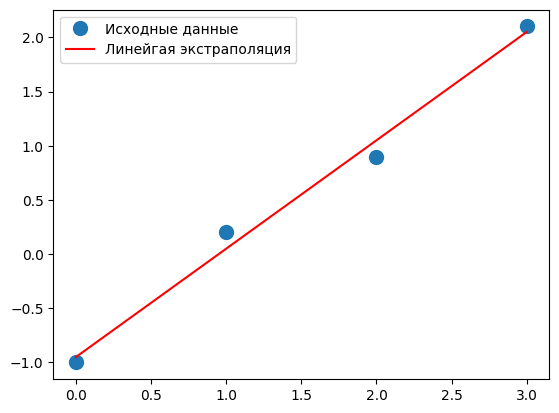

In [ ]:
import numpy as np
x = np.array([0,1,2,3])
y = ([-1,0.2,0.9,2.1])

#перепишем линейное уравнение y = mx + c как y =Ap, где A = [[ x 1 ]] и 
#p = [[m],[c]]
#Построим A по x:

A = np.vstack([x,np.ones(len(x))]).T
A

#Используем метод lstsq для решения кго относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m,c)

#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt 
plt.plot(x,y,'o',label = 'Исходные данные', markersize=10)
plt.plot(x,m*x+c,"r",label = 'Линейгая экстраполяция')
plt.legend()
plt.show()

**1.1.2 Пример**


Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в 
построении эстраполяционного полинома второго порядка (параболы). Таким 
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу 
наименьших квадратов. Данные мтогут быть получены в результате 
измерений. Покажем пример генерации данных случайным образом и 
загрузки их из файла.

[-4.85814031 -4.28835814 -2.57611953 -1.8366679  -0.77651203 -0.10541711
  1.36511875  1.87526736  2.62486016  4.42897131  4.63678727]
[25.08090904 15.83464841  9.19554939  4.37530685  1.2297441  -0.11917821
  0.7393108   4.285765    9.43790132 15.98542825 24.78467593]


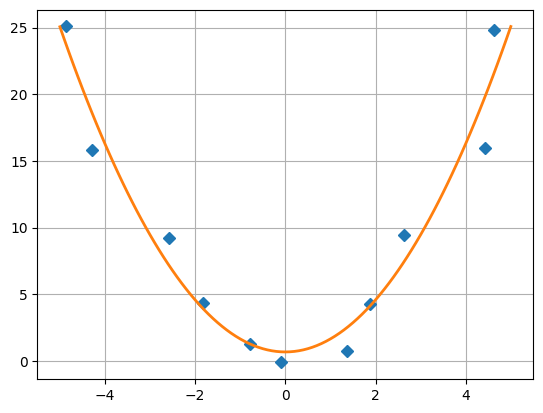

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

**1.1.3 Пример**



По данным предыдущего примера постройте эстраполяционного полинома 
третьего порядка



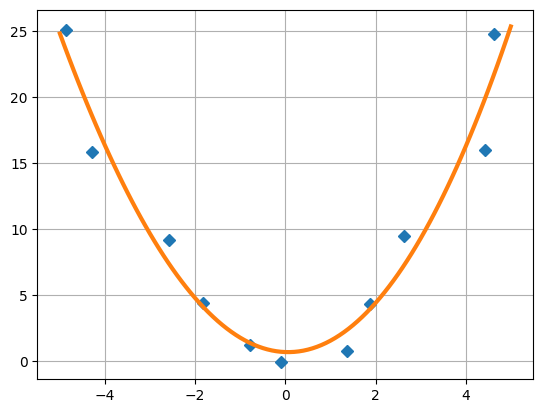

In [ ]:
#Решение
# Нахождение коэффициентов функции вида y = ax^3+bx^2+cx+d методом наименьших квадратов
# задаем вектор m = [x**3,x,E]
m = vstack((x**3,x**2,x,ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond=None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5,5,101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

**Задание:**


Представьте собственные данные и постройте эктраполяцию полиномами 
первой, второй и третьей степени.


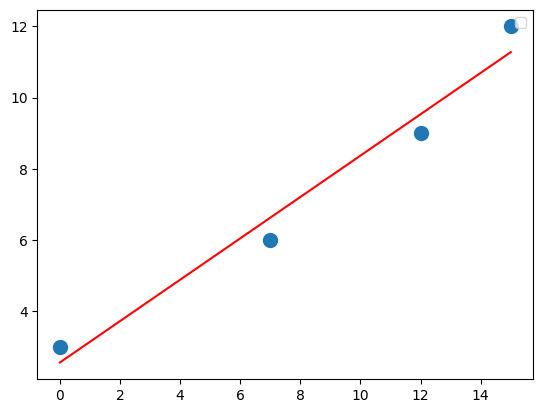

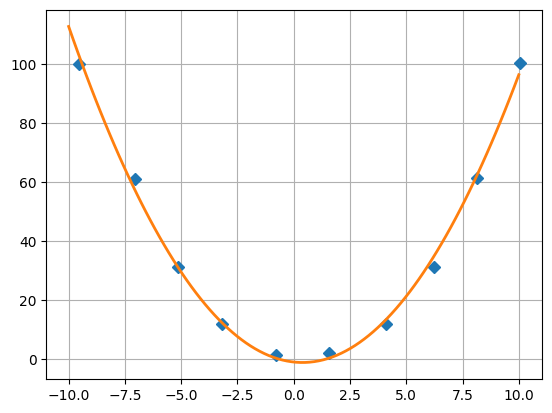

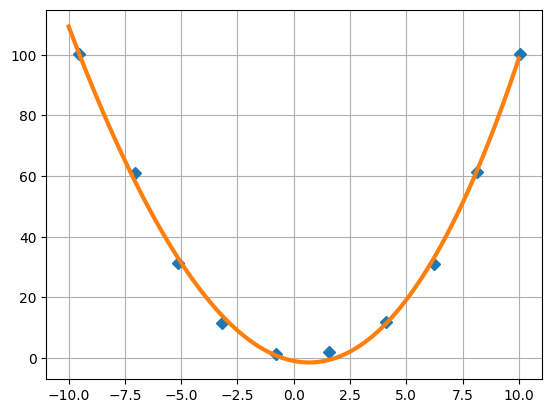

In [ ]:
x=array([0,7,12,15])
y=array([3,6,9,12])
A=vstack((x,ones(len(x)))).T
m,c = np.linalg.lstsq(A,y,rcond=None)[0]
plt.plot(x,y,'o',markersize=10)
plt.plot(x,m*x+c,'r')
plt.legend()
plt.show()
delta = 1.0
x= linspace(-10,10,10)
y= x**2+delta*(rand(10))
x+= delta*(rand(10))
m= vstack((x ** 2, x, ones(10))).T
s= linalg.lstsq(m, y, rcond=None)[0]
x_prec=linspace(-10,10,100)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()
m=vstack((x ** 3, x ** 2, x, ones(10))).T
s=linalg.lstsq(m, y, rcond=None)[0]
x_prec=linspace(-10,10,100)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')
plt.show()

**1.1.4 Пример**


Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1*𝑒𝑥𝑝(−𝑏^2*𝑥^2)


0.00018270915710164894
0.09434103339759427


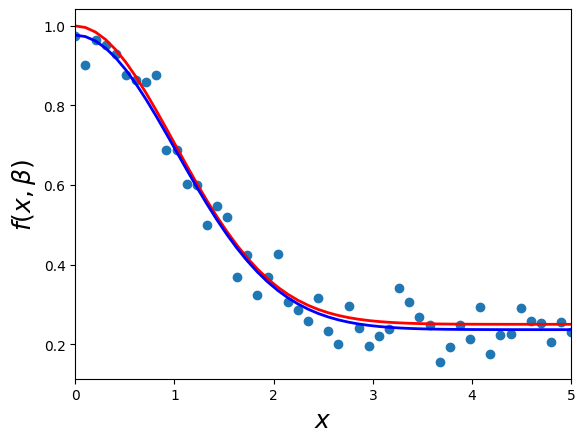

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.97485554 0.90260969 0.9650489  0.9512496  0.92969597 0.87745557
 0.86497482 0.85963928 0.8757264  0.68812551 0.68852442 0.60233547
 0.60091239 0.49849212 0.54830256 0.52078792 0.36854133 0.42423502
 0.32377355 0.36782115 0.42706086 0.30662101 0.28678742 0.25858487
 0.3149691  0.23398059 0.20117854 0.29598953 0.24108028 0.19606377
 0.22001176 0.23927094 0.34225415 0.30591585 0.2678984  0.24851772
 0.15545091 0.19251679 0.24741815 0.21

In [ ]:
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*exp(-b2* x**2)
# зададим массив точек xi
xdata=linspace(0,5,50)
# создаем теоретически правильные значения точек yi (без шума)
y=f(xdata,*beta)
# зашумляем эти данные
ydata=y+0.05*randn(len(xdata))

#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt,beta_cov = curve_fit(f, xdata, ydata)
beta_opt

#Вычислим линейное отклонение
lin_dev=sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata-f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize=18)
plt.show()

print(xdata)
print(ydata)

**1.1.5 Пример**


Задача: Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида: 


1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥


2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2


3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)


4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏



[0.24822963 0.74590962]
0.00010273921096110309
0.09033964922848259


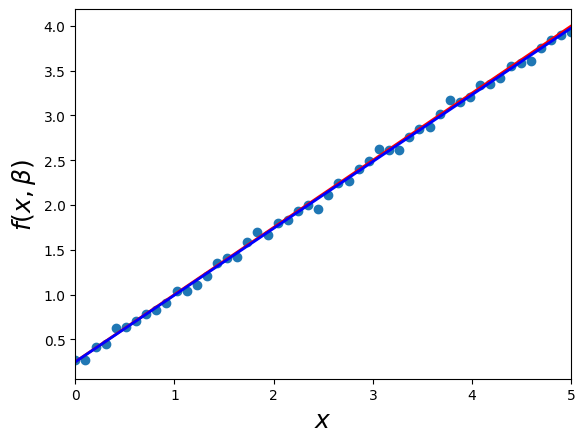

[0.22690708 0.76564405 0.49762036]
0.00015787590749677096
0.13165197939728696


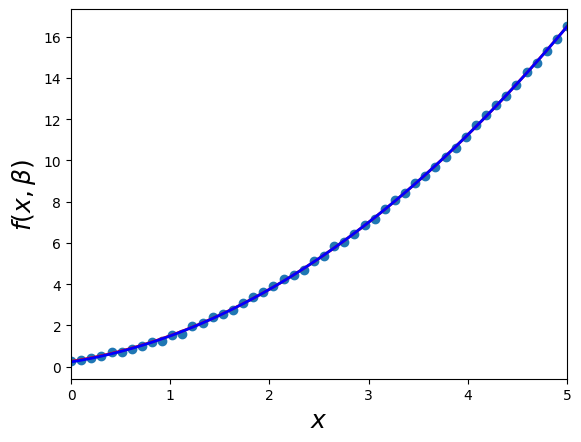

[0.98903186 2.01535168]
6.688428644006315e-05
0.15466598855863598


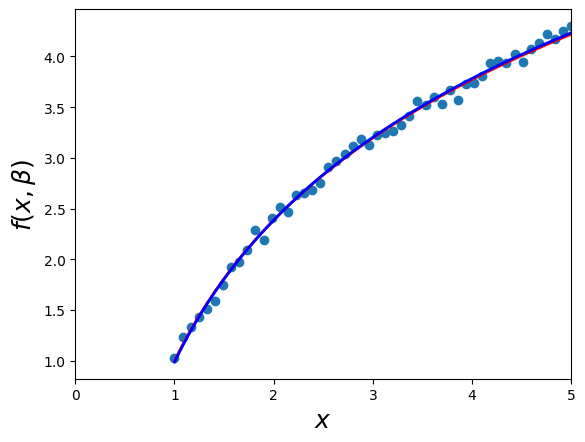

[0.99656708 2.0020491 ]
5.3191112098263255e-06
0.1280390214367558


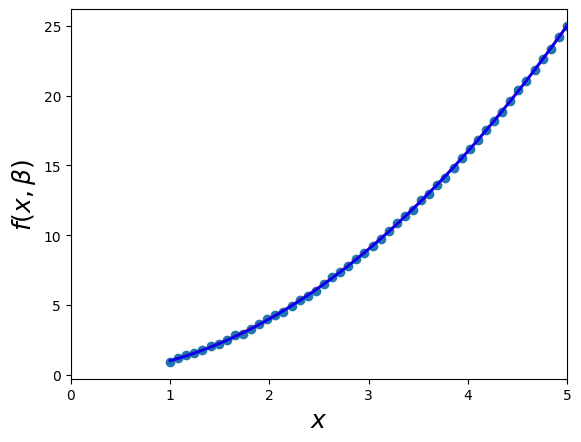

In [ ]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) c коэффицентами beta=(0.25,0.75)
beta=(0.25,0.75)
def f(x,b0,b1):
    return b0+b1*x
#зададим массив точек xi
xdata = linspace(0, 5, 50)
#cоздаем теоретически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычисляемлинейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b = (0.25б 0.75,0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
#зададим массив точек xi
xdata = linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумляем эти данные 
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислить квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b = (1,2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * log(x)
#заданим массив точек xi
xdata = linspace(1, 5, 50)
#созадем теоретически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b = (1,2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
#заданим массив точек xi
xdata = linspace(1, 5, 50)
#созадем теоретически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

**Задание:**


Подставьте собственные данные и поэкспериментируйте с представленными 
функциями. Проанализируйте динамику изменения данных.

[ 22.45506654  91.41631289 887.6451956 ]
54.73100157250915
244049.59296267125


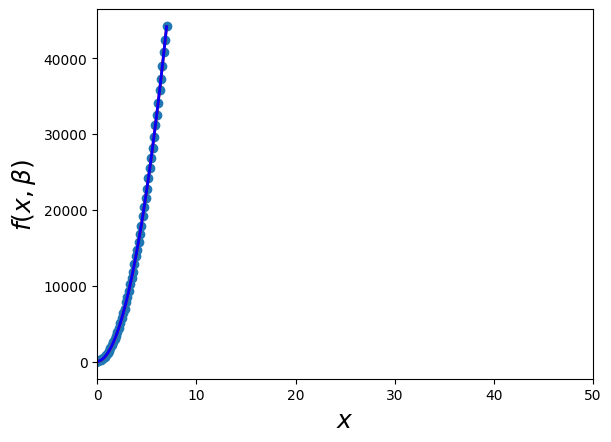

In [ ]:
beta = (8,88,888)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
#заданим массив точек xi
xdata = linspace(-7, 7, 100)
#созадем теоретически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 50 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 50)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

**1.2. Теоретический материал – Задачи регрессии**


**Линейная регрессия**- это широко используемый метод статистического 
анализа, который использует регрессионный анализ в математической 
статистике для определения количественной взаимосвязи между двумя или 
более переменными. Если регрессионный анализ включает две или более 
независимых переменных, а связь между зависимой и независимой 
переменными является линейной, тогда имееи дело с множественной линейной 
регрессией.


В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного 
обучения можно использовать для реализации функций регрессии. Мы начнем 
с простой линейной регрессии с участием двух переменных, а затем перейдем к 
линейной регрессии с участием нескольких переменных.


**1.2.1 Пример**


Задача:
Построим простую линейную регрессию в Python с использованием 
библиотеки scikit-learn

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.887500  53.700000
std         1.501041  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.875000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


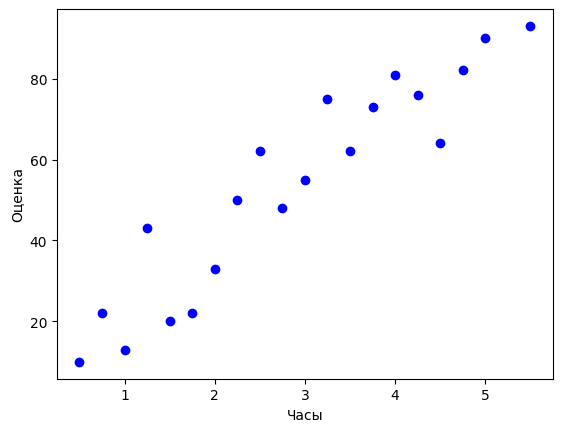

In [ ]:
#Импортируем необходимые библиотеки
#используем pandas и numpy для обработки данных
#matpoltlib для визуализации и sklearn для обучения набора данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваймостью
my_dict = {
    'Учебное время': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5],
    'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]
}

dataset = DataFrame(my_dict)
print(dataset.head(5))

#исследуем набор данных 
print(dataset.shape)
print(dataset.describe())

#Рисуем диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='Данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию 
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки 
– это зависимые переменные, значения которых должны быть предсказаны. В 
нашем наборе всего два столбца и необходимо предсказать оценку в 
зависимости от количества часов. Чтобы извлечь атрибуты и метки, 
выполните следующий скрипт:

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

#Теперь когда у нас есть атрибуты и метки, необходимость разделить их на а обучающий и тестовый наборы.
#приведенный фрагмент 80 % данных на обучающий набор, а 20% данных - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#далее можно обучить алгоритм линейной регрессии 
#необходимо импортировать класс LinelRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#приведем полученные коэффиценты для линейной регрессии 
print(regressor.intercept_)
print(regressor.coef_)

[[1.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [2.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [3.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [4.0000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [3.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [4.0000e+00 5.3420e+03 1.3330e+03 5.7100e-01]
 [5.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [3.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [5.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [5.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [4.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [5.0000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [4.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [5.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [4.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [5.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [6.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [0.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [6.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [3.0000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [1.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [3.0000e+00 

Получившийся результат можно интерпретировать следующим образом: с 
каждым затраченным часом на обучение результат экзамена повышается 
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы 
будем использовать наши тестовые данные и посмотрим, насколько точно наш 
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на 
тестовых данных необходимо выполнить следующий код:

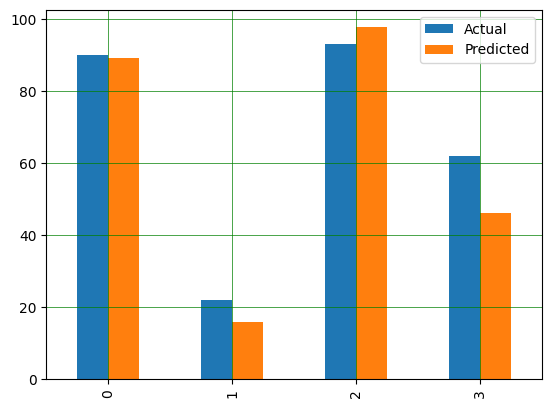

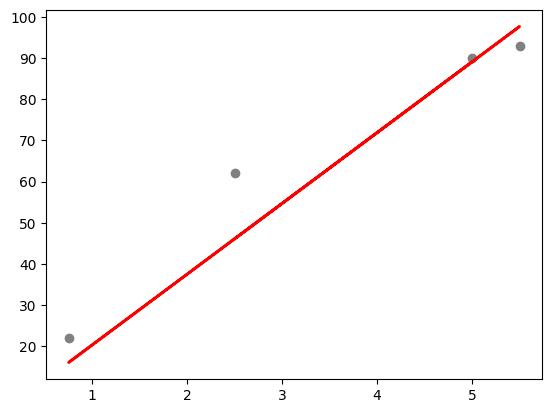

In [ ]:
y_pred = regressor.predict(x_test)
#сравним фактические значения с прогнозиремыми
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

#визуализируем результат сравнения 
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#построим линию регресии с тестовыми данными 
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

**Задание:**


Постройте модель линейной регрессии для произвольных данных из двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы:


(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). 


Найдите коэффициенты линии регрессии. Постройте прогноз.


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


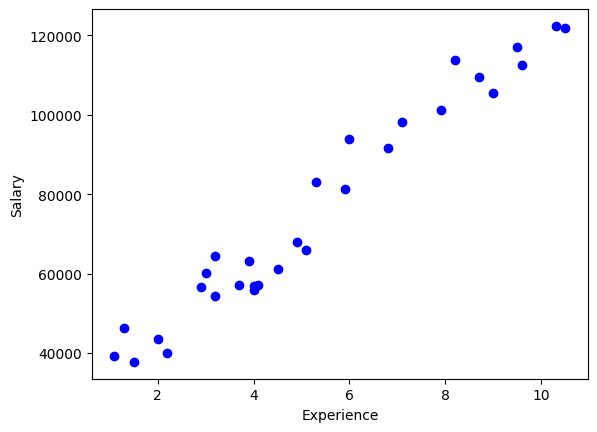

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


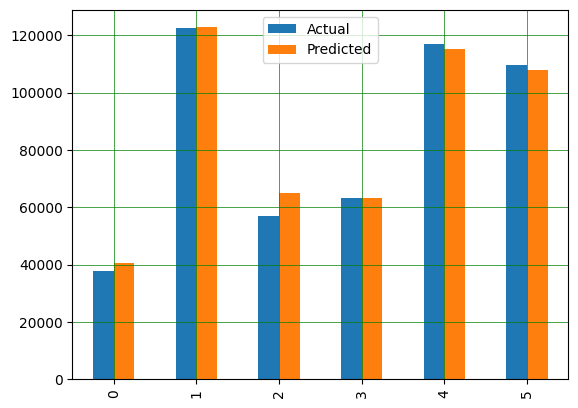

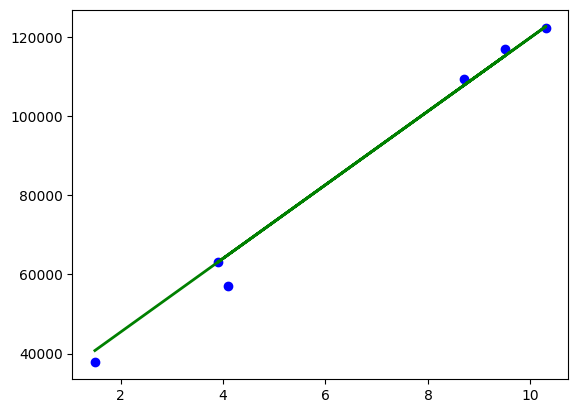

In [ ]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
print(dataset.head(5))

print(dataset.shape)
print(dataset.describe())

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label='Salary data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='green', linewidth=2)
plt.show()

**1.3. Теоретический материал – Множественная регрессия**


В предыдущем примере мы проиллюстрировали линейную регрессию 
с двумя переменными. Однако, почти все реальные задачи имеют больше 
параметров. Линейная регрессия с участием нескольких переменных 
называется «множественной линейной регрессией» или многомерной 
линейной регрессией. Шаги для выполнения множественной линейной 
регрессии аналогичны шагам для простой . Разница заключается в оценке. 
Вы можете использовать множественную регрессию, чтобы узнать, какой 
фактор оказывает наибольшее влияние на прогнозируемый результат или 
как различные переменные связаны друг с другом.


**1.3.1 Пример**


Задача:
Для решения задачи множественной регрессии можно задействовать уже 
известный метод numpy.linalg.lstsq.

In [ ]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
    [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

x = np.transpose(x) # transpose to input vectors
x = np.c_[x, np.ones(x.shape[0])] # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


**1.3.2 Пример**


Задача:
Для данных из предыдущей задачи построить модель множественной 
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
    [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
print(dataset.head())

#изучим данные
print(dataset.shape)
print(dataset.describe())

#разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

#раздлеим данные на обуччающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#выведем кожффициенты модели 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000
Mean Squared Error: 1.3272699242343076


**Задание**



Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа (в миллионах галлонов) в 48 штатах США или набор данных о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты 
множественной регрессии. Постройте прогноз.
1. 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [ ]:
url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
print(dataset.head(5))

y = list(dataset['Petrol_tax'])
x = [list(dataset['Average_income']),
        list(dataset['Paved_Highways']),
        list(dataset['Population_Driver_licence(%)']),
        list(dataset['Petrol_Consumption'])]

new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
print(dataset.head())

print(dataset.shape)
print(dataset.describe())

x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
   y      x1      x2     x3      3
0  1  3571.0  1976.0  0.525  541.0
1  2  4092.0  1250.0  0.572  524.0
2  3  3865.0  1586.0  0.580  561.0
3  4  4870.0  2351.0  0.529  414.0
4  3  4399.0   431.0  0.544  410.0
(23, 5)
               y           x1            x2         x3           3
count  23.000000    23.000000     23.000000  23.000000   23.000000
mean    3.565217  4529.913043